In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error

In [2]:
with open("preprocessed_data.pkl", "rb") as f:
    data = pickle.load(f)

X_train = data["X_train"]
X_val   = data["X_val"]
X_test  = data["X_test"]
y_train = data["y_train"]
y_val   = data["y_val"]
y_test  = data["y_test"]


# Convert to numpy arrays
X_train_np = X_train.values
X_val_np   = X_val.values
X_test_np  = X_test.values
y_train_np = y_train.values
y_val_np   = y_val.values
y_test_np  = y_test.values

In [3]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_np.shape[1],)),
    Dropout(0.2),

    Dense(64, activation='relu'),
    Dropout(0.2),

    Dense(32, activation='relu'),

    Dense(1)  # regression output
])

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

model.summary()

C:\Users\Patrick\PycharmProjects\PythonProject1\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,185 (51.50 KB)

 Trainable params: 13,185 (51.50 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)


In [5]:
history = model.fit(
    X_train_np, y_train_np,
    validation_data=(X_val_np, y_val_np),
    epochs=100,
    batch_size=128,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
7790/7790 ━━━━━━━━━━━━━━━━━━━━ 8s 865us/step - loss: 16.0981 - mae: 2.2960 - val_loss: 14.8151 - val_mae: 2.3267
Epoch 2/100
7790/7790 ━━━━━━━━━━━━━━━━━━━━ 8s 960us/step - loss: 13.8184 - mae: 2.0882 - val_loss: 13.9903 - val_mae: 2.0324
Epoch 3/100
7790/7790 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 13.2643 - mae: 2.0442 - val_loss: 13.4080 - val_mae: 2.1393
Epoch 4/100
7790/7790 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 12.9902 - mae: 2.0220 - val_loss: 13.0210 - val_mae: 2.0742
Epoch 5/100
7790/7790 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 12.7829 - mae: 2.0060 - val_loss: 12.9000 - val_mae: 2.0691
Epoch 6/100
7790/7790 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 12.6298 - mae: 1.9913 - val_loss: 13.1508 - val_mae: 2.1058
Epoch 7/100
7790/7790 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 12.5220 - mae: 1.9833 - val_loss: 12.8277 - val_mae: 2.1260
Epoch 8/100
7790/7790 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 12.4524 - mae: 1.9743 - val_loss: 13.2953 - val_mae: 2.2819
Epoch 9/100


In [6]:
preds = model.predict(X_test_np).flatten()

mse = mean_squared_error(y_test_np, preds)
rmse = np.sqrt(mse)

print(f"DNN RMSE: {rmse:.4f}")

6677/6677 ━━━━━━━━━━━━━━━━━━━━ 2s 310us/step
DNN RMSE: 3.3909


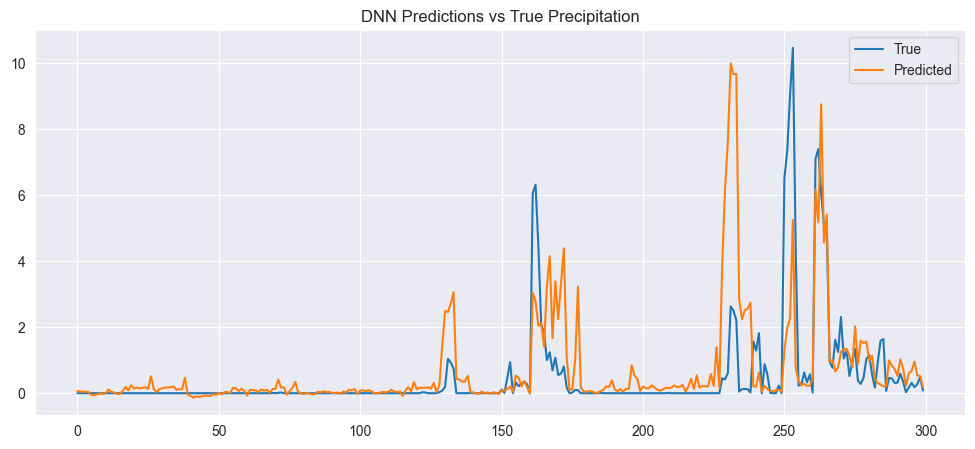

In [7]:
plt.figure(figsize=(12,5))
plt.plot(y_test_np[:300], label="True")
plt.plot(preds[:300], label="Predicted")
plt.title("DNN Predictions vs True Precipitation")
plt.legend()
plt.show()


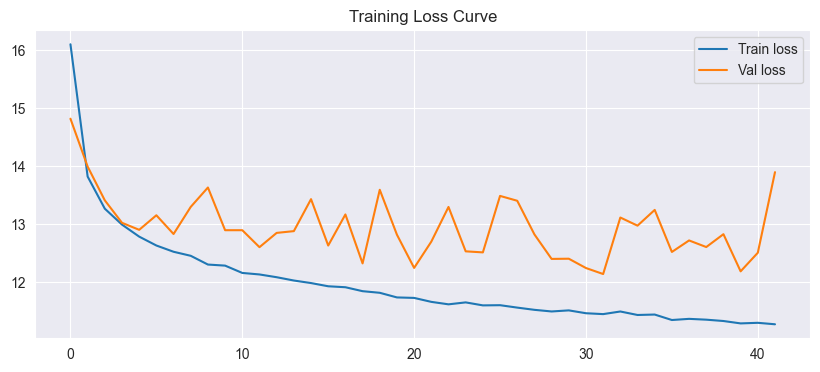

In [8]:
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.title("Training Loss Curve")
plt.legend()
plt.show()